## Regression Analysis

In [ ]:
# install and load the package need
install.packages('xlsx')
library('xlsx')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# read the data from sheet Nu 1
df = read.xlsx('data/Reg example1.xlsx', 1)

### Explore the data

In [ ]:
# explore the data
head(df)

,X1,X2,y
,<dbl>,<dbl>,<dbl>
1,100,10,370
2,120,20,420
3,120,30,390
4,130,35,415
5,150,66,402
6,80,33,221


In [ ]:
summary(df)

       X1               X2              y        
 Min.   : 55.00   Min.   :10.00   Min.   :100.0  
 1st Qu.: 97.25   1st Qu.:21.50   1st Qu.:282.5  
 Median :107.50   Median :33.00   Median :338.0  
 Mean   :107.35   Mean   :38.00   Mean   :324.8  
 3rd Qu.:120.50   3rd Qu.:56.25   3rd Qu.:392.5  
 Max.   :150.00   Max.   :80.00   Max.   :460.0  

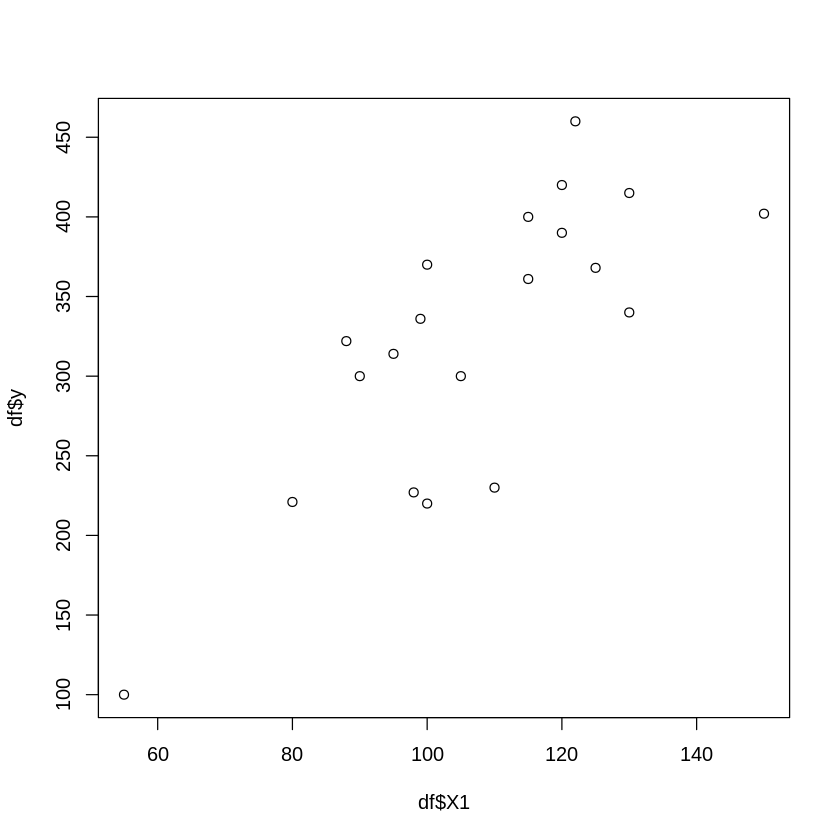

In [ ]:
plot(df$X1, df$y)

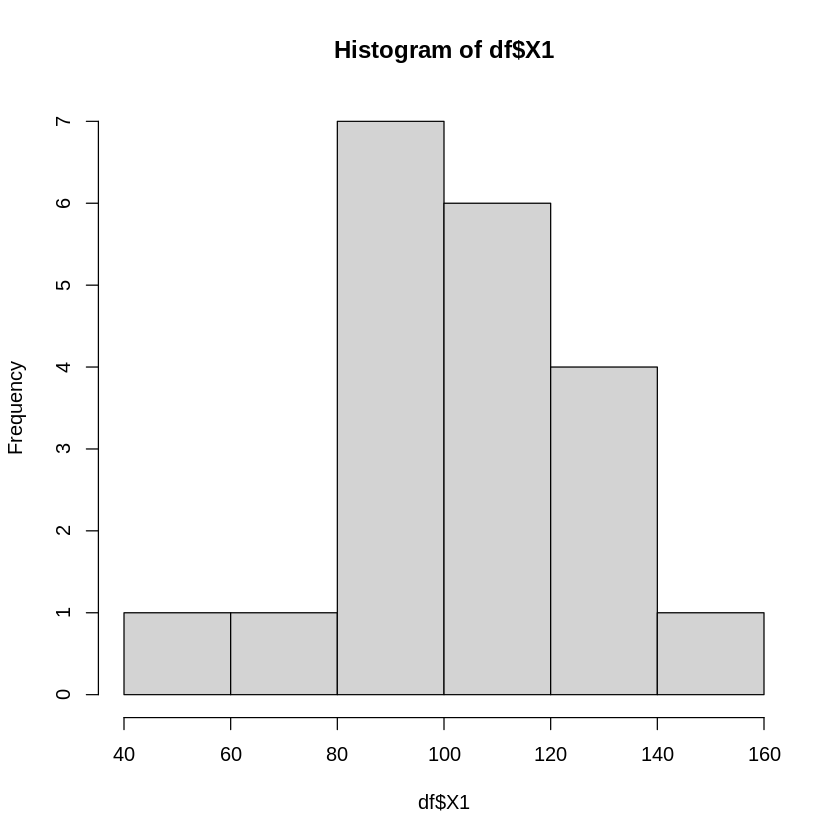

In [ ]:
hist(df$X1);

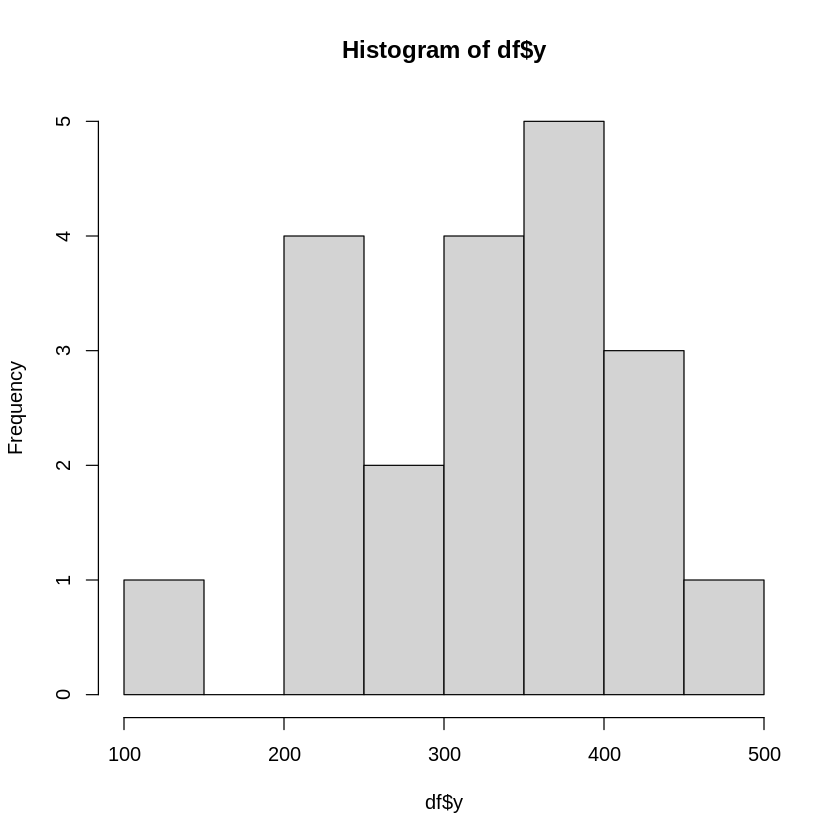

In [ ]:
hist(df$y)

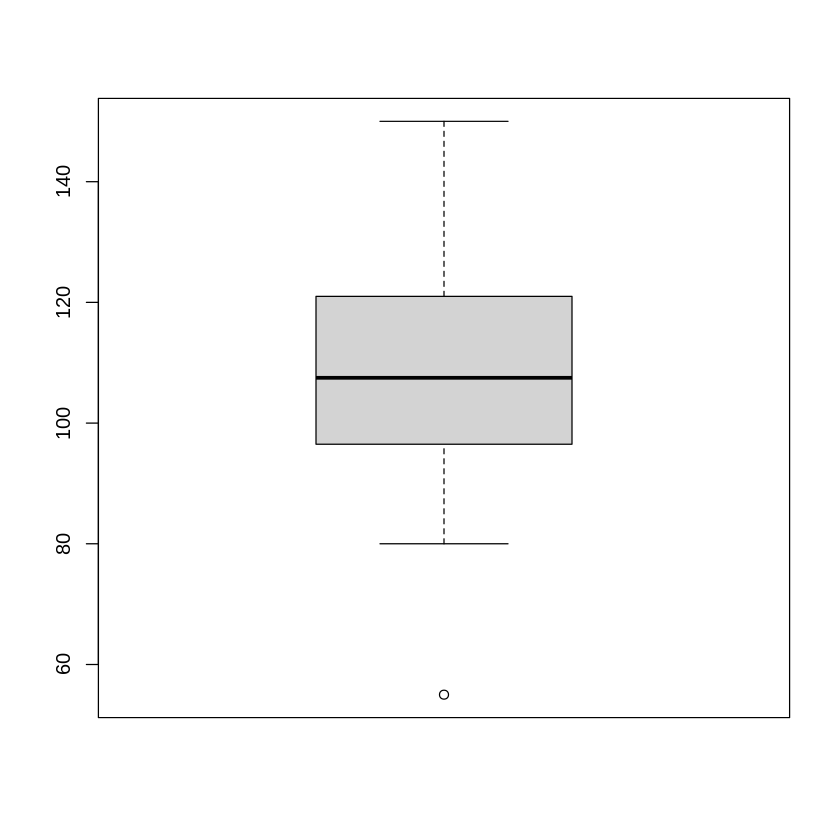

In [ ]:
boxplot(df$X1)

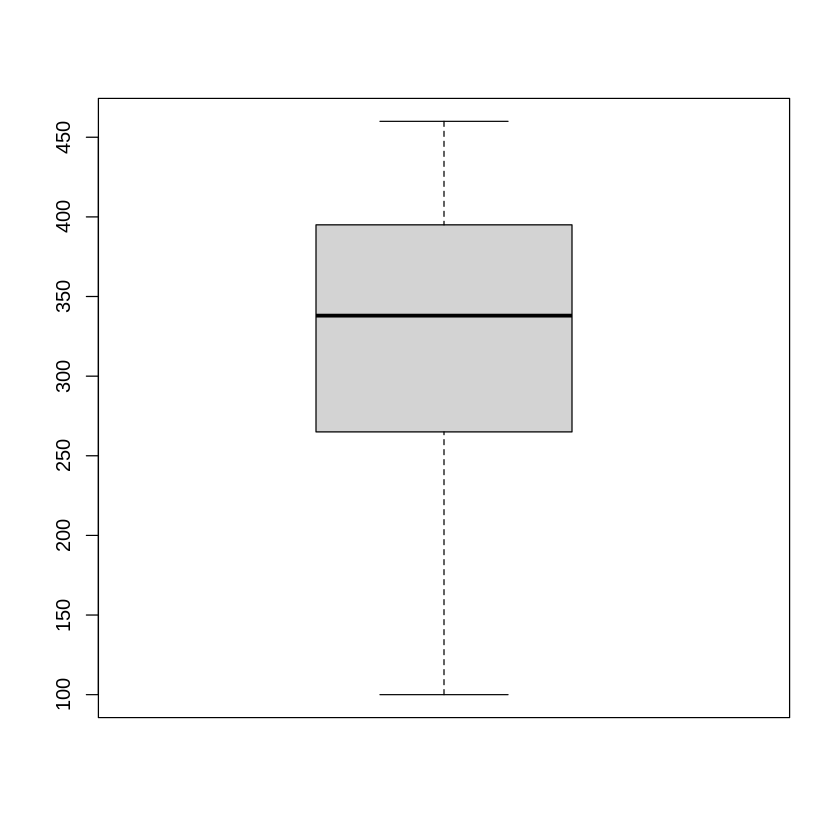

In [ ]:
boxplot(df$y)

In [ ]:
cor(df$X1, df$y)

[1] 0.7795866

In [ ]:
# correlation is significant as the p-value less then alpha (Reject H_0)
cor.test(df$X1, df$y)


	Pearson's product-moment correlation

data:  df$X1 and df$y
t = 5.2811, df = 18, p-value = 5.073e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5145911 0.9086413
sample estimates:
      cor 
0.7795866 


In [ ]:
cor.test(df$X1, df$y, conf.level = 0.9)


	Pearson's product-moment correlation

data:  df$X1 and df$y
t = 5.2811, df = 18, p-value = 5.073e-05
alternative hypothesis: true correlation is not equal to 0
90 percent confidence interval:
 0.5685517 0.8943503
sample estimates:
      cor 
0.7795866 


### Fit Regression


In [ ]:
# access the variables present in the data framework without calling the data frame
attach(df)

In [ ]:
fit = lm(y~X1, data = df)
summary(fit)


Call:
lm(formula = y ~ X1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-103.50  -54.45   13.45   41.49   87.09 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27.7556    67.9644  -0.408    0.688    
X1            3.2842     0.6219   5.281 5.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57 on 18 degrees of freedom
Multiple R-squared:  0.6078,	Adjusted R-squared:  0.586 
F-statistic: 27.89 on 1 and 18 DF,  p-value: 5.073e-05


- From **F-statistc's** p-value we should reject H_0 that say that all Betas is not significent
- **X1** from t-test's p-value say is significent
- **B_0** from t-test's p-value say is not significent
- **R^2** = 62% (say that we can explain 62% of change in y)
- **Adj R^2** = 58% 
- **Residual standard error** = 57 it measures the average of the squares of the errors. Lower values (closer to zero) indicate better fit.

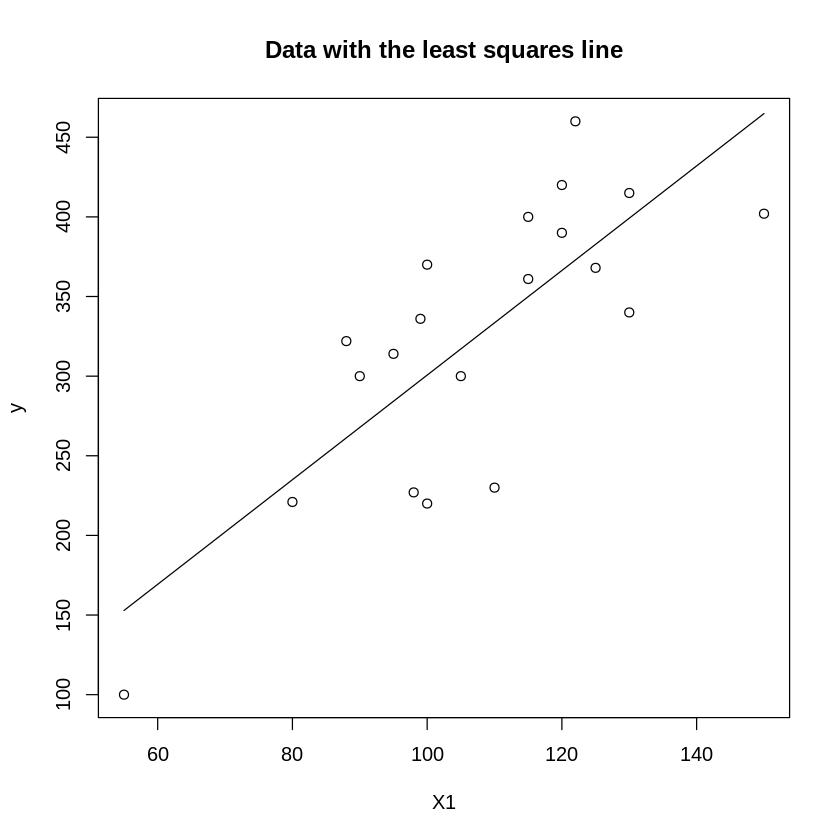

In [ ]:
# draw a scatterplot of the data  
plot(X1, y)
# add a line with the fitted values
lines(X1, fit$fitted.values)

title("Data with the least squares line")

In [ ]:
# to get all objects of fir
names(fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [ ]:
# analysis of variance
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,90627.98,90627.976,27.88972,5.073477e-05
Residuals,18,58491.22,3249.512,NA,NA


- **Analysis of variance**
- Define that the respone of y contain of x1 and Residual
    - The sum of sq for variables must be greater then Residual if no reject this model and it mean it can explain y more then Residual
- F-value is about mean sq(x1)/mean sq(Residual) (90627/3249)
- mean sq is about (sum sq/df) (58491/18)
- Residual Standard Erro = sqrt(mean sq) (3249^0.5) = 57

In [ ]:
# make intercept =0
fit_1 = lm(y~0+X1)
summary(fit_1)



Call:
lm(formula = y ~ 0 + X1)

Residuals:
    Min      1Q  Median      3Q     Max 
-103.82  -53.53   16.25   39.42   89.77 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
X1    3.035      0.114   26.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 55.74 on 19 degrees of freedom
Multiple R-squared:  0.9739,	Adjusted R-squared:  0.9725 
F-statistic: 708.1 on 1 and 19 DF,  p-value: < 2.2e-16


### Residual Analysis

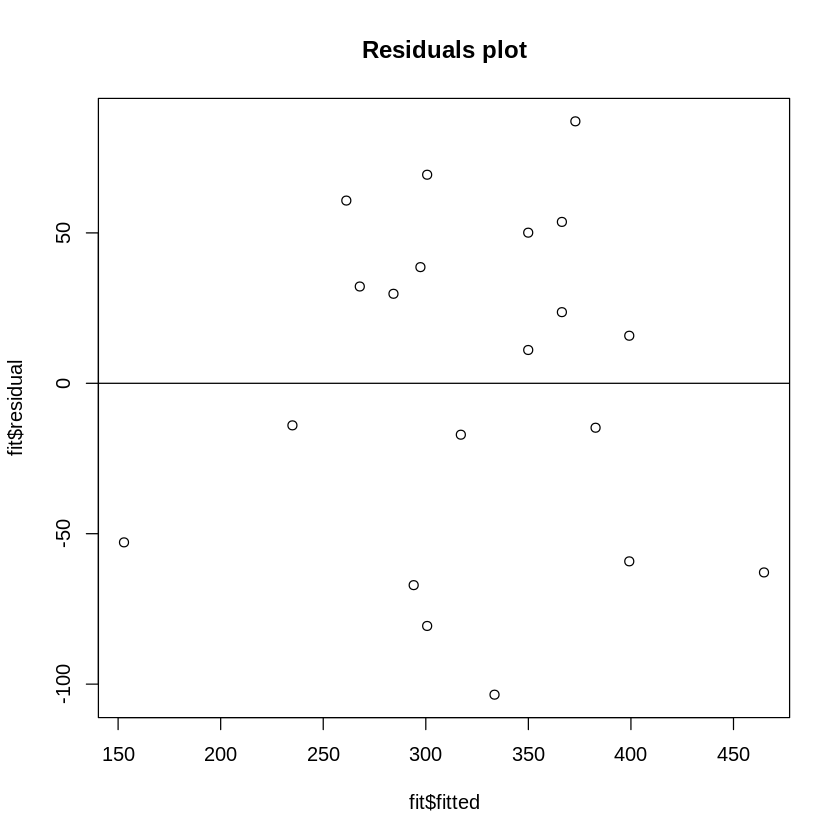

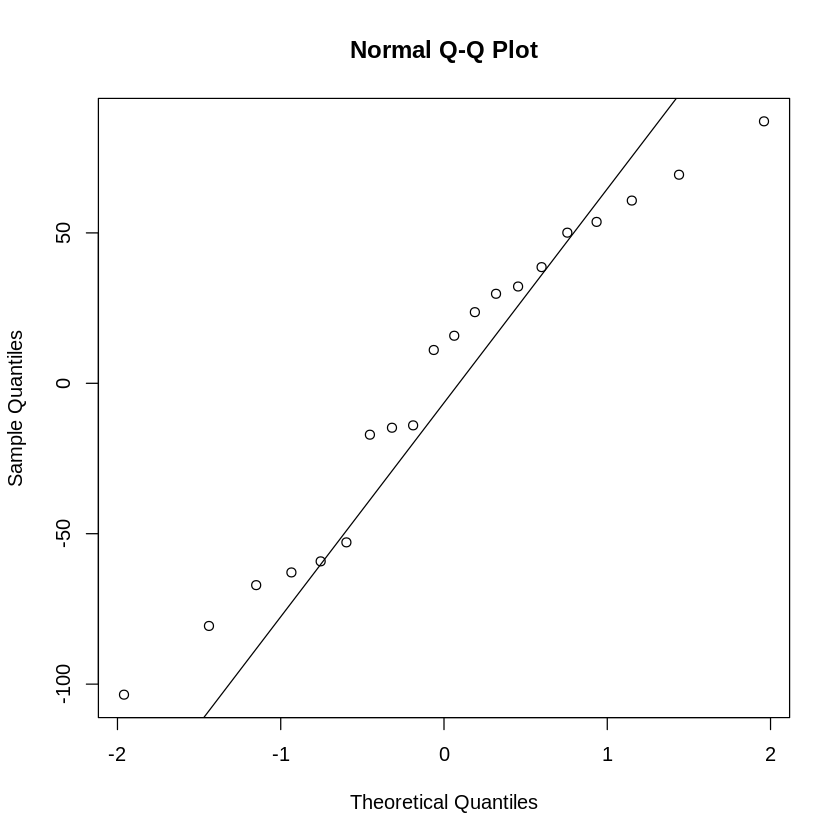

In [ ]:
plot(fit$fitted,fit$residual) # plot the residuals versus the fitted values
abline(0,0) # add a line with slope 0 and mean zero
title("Residuals plot")
qqnorm(fit$resid) ; qqline(fit$resid)
# qqnorm test the normal

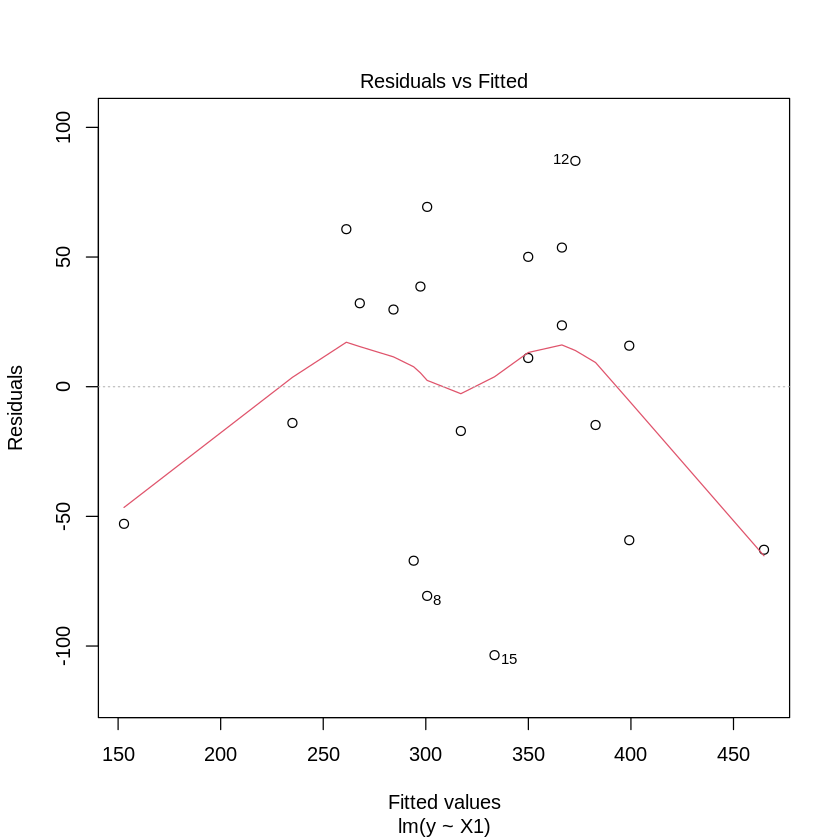

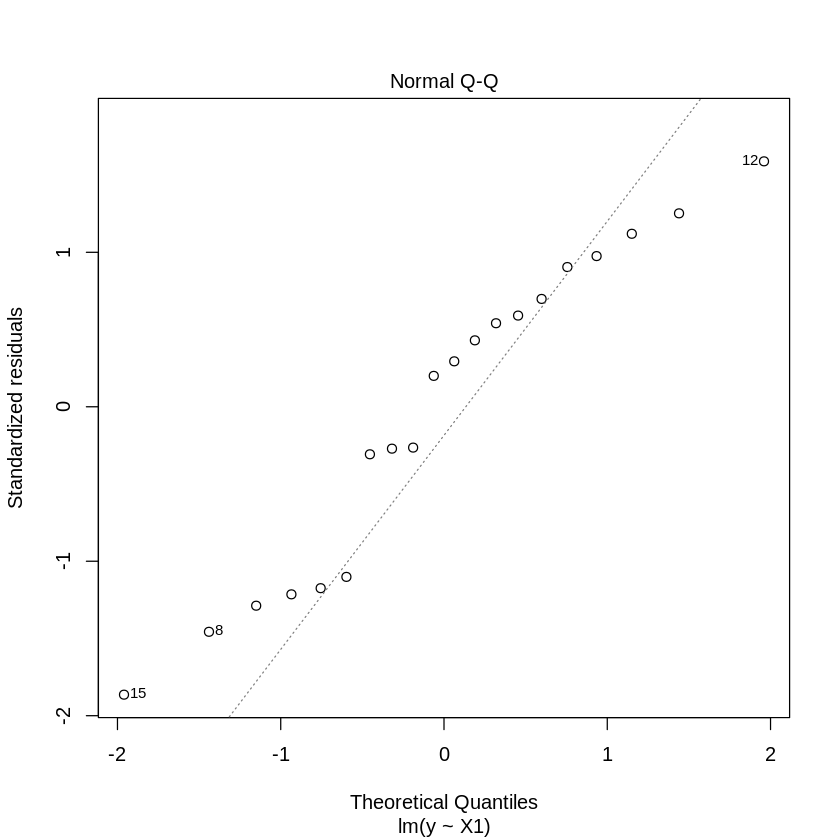

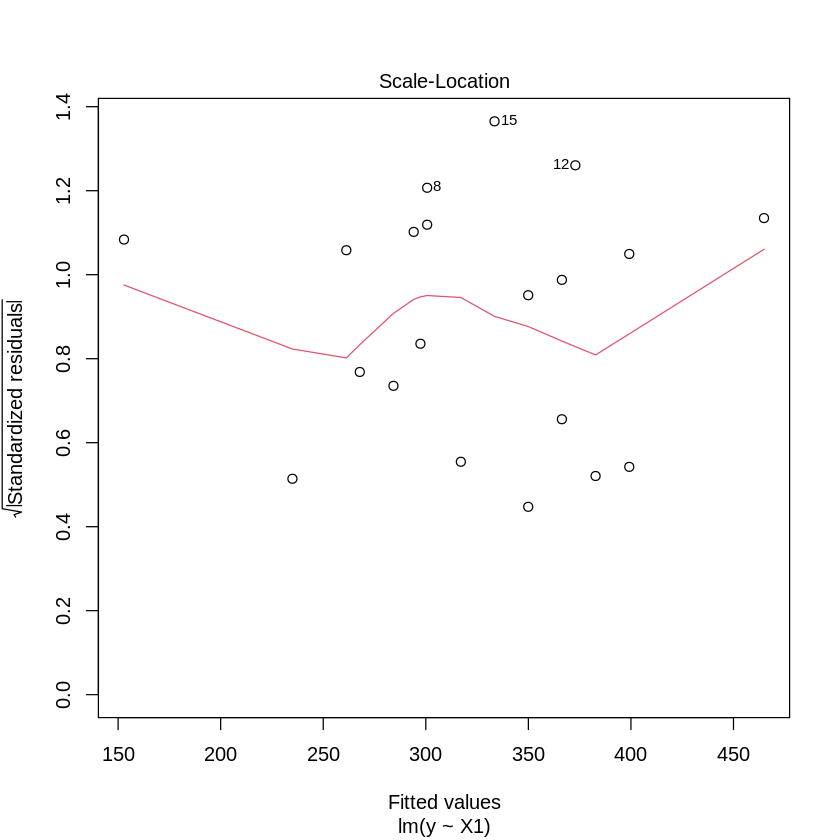

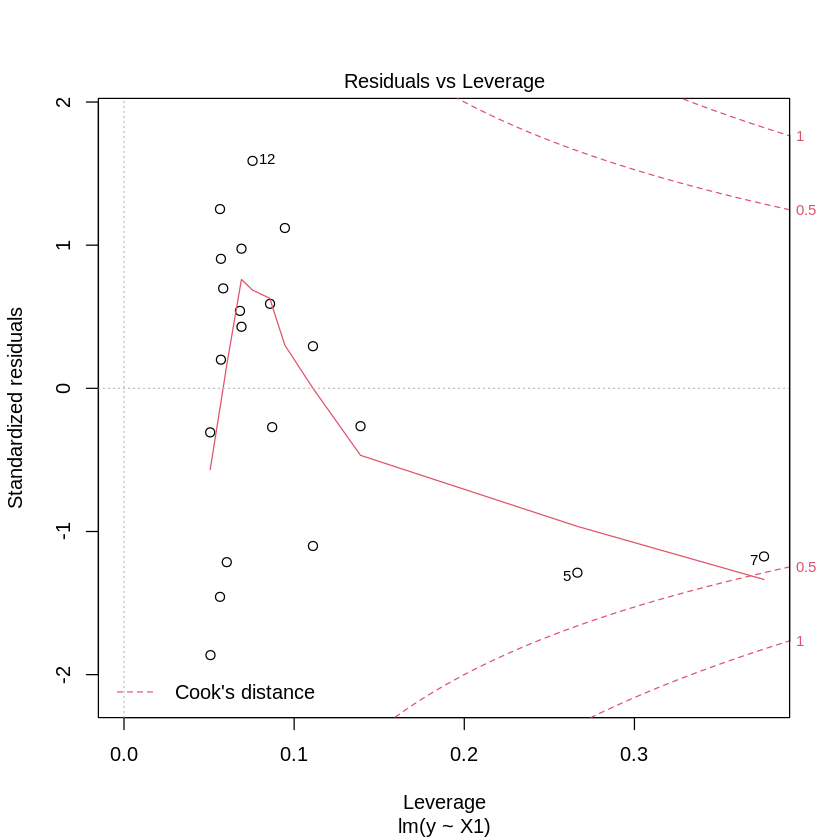

In [ ]:
# another way to get the graphs
plot(fit)